This is a jupyter notebook for Waltham. All visualizations and analysis for the city will be done in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the data and store it as a dataframe 
df = pd.read_csv("/Users/aksheynischal/Desktop/506/waltham/total.csv")
display(df)

,DocNum,AgencyName,Type,Status,StatusDate,IssueDate
0,15000172,WAL-PD,FIO,ACTIVE,12/22/2015 14:06:00,04/30/2021 14:14:00
1,16000002,WAL-PD,FIO,ACTIVE,01/08/2016 1:18:00,01/08/2016 1:29:00
2,16000004,WAL-PD,FIO,ACTIVE,01/11/2016 1:20:00,01/11/2016 1:18:00
3,16000011,WAL-PD,FIO,ACTIVE,02/01/2016 16:09:00,02/01/2016 16:09:00
4,16000014,WAL-PD,FIO,ACTIVE,02/20/2016 11:34:00,02/20/2016 11:33:00
...,...,...,...,...,...,...
183,20000050,WAL-PD,FIO,ACTIVE,11/11/2020 21:43:00,11/11/2020 21:42:00
184,21000004,WAL-PD,FIO,ACTIVE,03/27/2021 17:07:00,03/27/2021 16:56:00
185,21000016,WAL-PD,FIO,ACTIVE,07/07/2021 14:56:00,07/07/2021 14:55:00
186,21000019,WAL-PD,FIO,ACTIVE,08/09/2021 19:21:00,08/09/2021 19:21:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the data and store it as a dataframe 
df_white = pd.read_csv("/Users/aksheynischal/Desktop/506/waltham/white.csv")
df_black = pd.read_csv("/Users/aksheynischal/Desktop/506/waltham/black.csv")
df_unknown = pd.read_csv("/Users/aksheynischal/Desktop/506/waltham/unknown.csv")

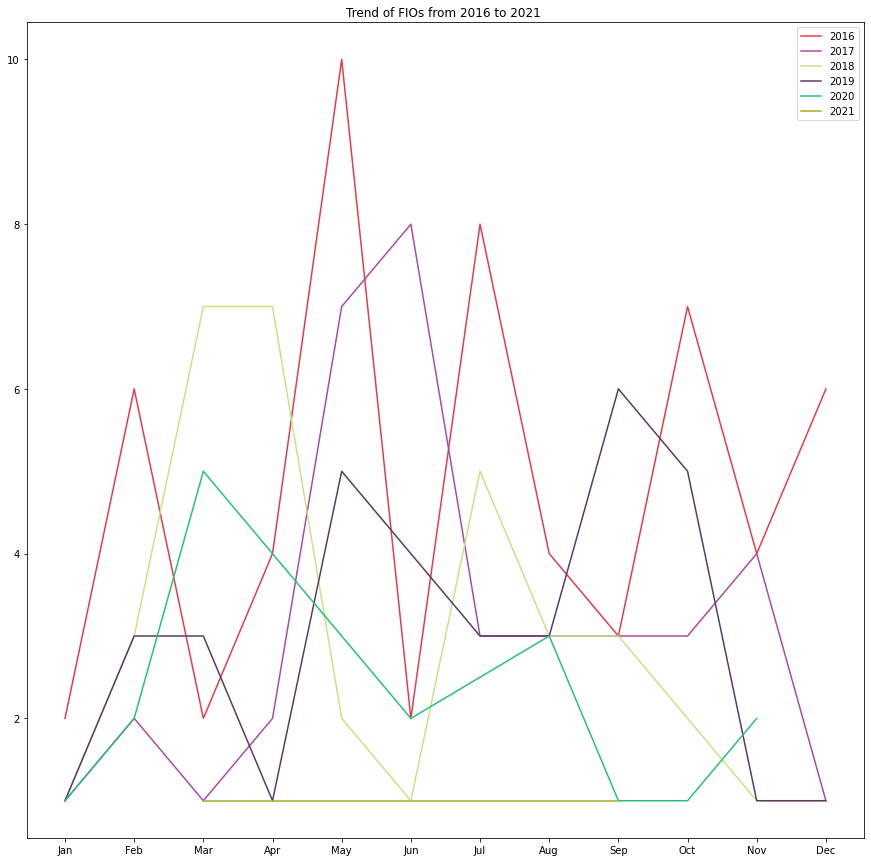

In [3]:
df['IssueDate'] = df['IssueDate'].apply(str)
df['Years'] = df['IssueDate'].apply(lambda x: x[6:10])
df['Months'] = df['IssueDate'].apply(lambda x: x[:2])
fig, ax = plt.subplots(figsize=(15, 15))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
ind = np.arange(12)
ax.set_xticks(ind, labels=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
yr_2016 = df[df['Years'] == '2016'].groupby('Months').size()
yr_2017 = df[df['Years'] == '2017'].groupby('Months').size()
yr_2018 = df[df['Years'] == '2018'].groupby('Months').size()
yr_2019 = df[df['Years'] == '2019'].groupby('Months').size()
yr_2020 = df[df['Years'] == '2020'].groupby('Months').size()
yr_2021 = df[df['Years'] == '2021'].groupby('Months').size()
plt.plot(sorted(yr_2016.index), yr_2016.values, color=np.random.rand(3,))
plt.plot(sorted(yr_2017.index), yr_2017.values, color=np.random.rand(3,))
plt.plot(sorted(yr_2018.index), yr_2018.values, color=np.random.rand(3,))
plt.plot(sorted(yr_2019.index), yr_2019.values, color=np.random.rand(3,))
plt.plot(sorted(yr_2020.index), yr_2020.values, color=np.random.rand(3,))
plt.plot(sorted(yr_2021.index), yr_2021.values, color=np.random.rand(3,))
plt.xlabel=('Months')
plt.ylabel=('Total FIOs Reported')
plt.title('Trend of FIOs from 2016 to 2021 ')
plt.legend(['2016', '2017', '2018', '2019', '2020', '2021'])
plt.show()


58


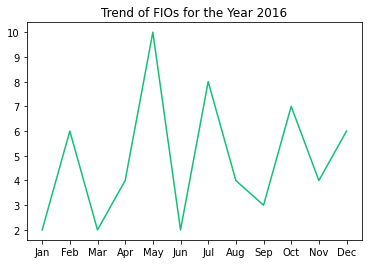

38


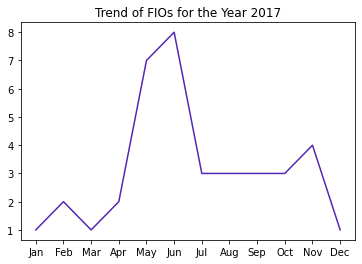

34


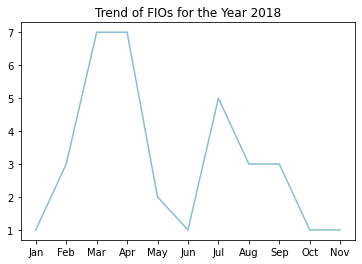

36


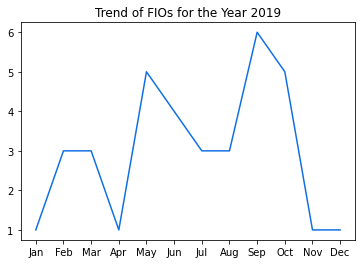

17


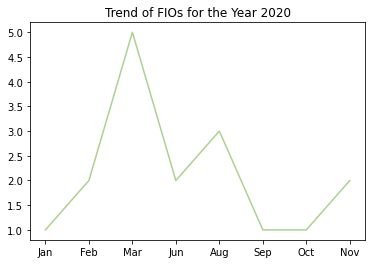

5


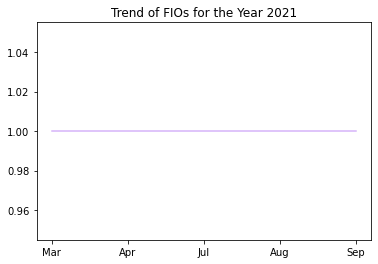

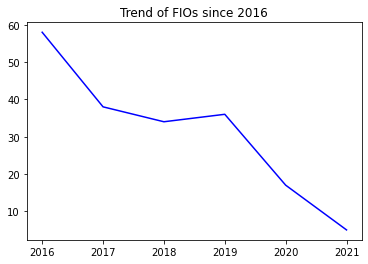

In [4]:
df['IssueDate'] = df['IssueDate'].apply(str)
df['Years'] = df['IssueDate'].apply(lambda x: x[6:10])
df['Months'] = df['IssueDate'].apply(lambda x: x[:2])
years = ['2016', '2017', '2018', '2019', '2020', '2021']
year_total = []
for i in range(len(years)):
    getYear = df[df['Years'] == years[i]]
    print(getYear.shape[0])
    year_total.append(len(getYear.index))
    per_month = getYear.groupby('Months').size()
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(1)
    if years[i] == '2020':
        ind = np.arange(8)
        ax.set_xticks(ind, labels=['Jan','Feb','Mar', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov'])
    elif years[i] == '2021':
        ind = np.arange(5)
        ax.set_xticks(ind, labels=['Mar','Apr', 'Jul', 'Aug', 'Sep'])
    else:
        ind = np.arange(12)
        ax.set_xticks(ind, labels=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.plot(per_month.index, per_month.values, color=np.random.rand(3,))
    plt.xlabel=('Months')
    plt.ylabel=('Total FIOs Reported')
    plt.title('Trend of FIOs for the Year ' + years[i])
    plt.show()
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
plt.plot(years, year_total, color='blue')
plt.xlabel=('Years')
plt.ylabel=('Total FIOs Reported')
plt.title('Trend of FIOs since 2016')
plt.show()

In [5]:
df['Race'] = 'U'
def setWhite(df, df1):
    for i in range(len(df.index)):
        for j in range(len(df1.index)):
            if df['DocNum'][i] == df1['DocNum'][j]:
                df['Race'][i] = 'W'
    return df

def setBlack(df, df1):
    for i in range(len(df.index)):
        for j in range(len(df1.index)):
            if df['DocNum'][i] == df1['DocNum'][j]:
                df['Race'][i] = 'B'
    return df

def setUnknown(df, df1):
    for i in range(len(df.index)):
        for j in range(len(df1.index)):
            if df['DocNum'][i] == df1['DocNum'][j]:
                df['Race'][i] = 'U'
    return df


setWhite(df, df_white)
setBlack(df, df_black)
setUnknown(df, df_unknown)
df.to_csv('Waltham.csv')
df.head()

/var/folders/8f/37yrvgj55k38v_j_8mktc1740000gn/T/ipykernel_91783/1036468625.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'][i] = 'W'
/var/folders/8f/37yrvgj55k38v_j_8mktc1740000gn/T/ipykernel_91783/1036468625.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'][i] = 'B'
/var/folders/8f/37yrvgj55k38v_j_8mktc1740000gn/T/ipykernel_91783/1036468625.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'][i]

,DocNum,AgencyName,Type,Status,StatusDate,IssueDate,Years,Months,Race
0,15000172,WAL-PD,FIO,ACTIVE,12/22/2015 14:06:00,04/30/2021 14:14:00,2021,04,W
1,16000002,WAL-PD,FIO,ACTIVE,01/08/2016 1:18:00,01/08/2016 1:29:00,2016,01,B
2,16000004,WAL-PD,FIO,ACTIVE,01/11/2016 1:20:00,01/11/2016 1:18:00,2016,01,B
3,16000011,WAL-PD,FIO,ACTIVE,02/01/2016 16:09:00,02/01/2016 16:09:00,2016,02,W
4,16000014,WAL-PD,FIO,ACTIVE,02/20/2016 11:34:00,02/20/2016 11:33:00,2016,02,W


<Figure size 432x288 with 0 Axes>

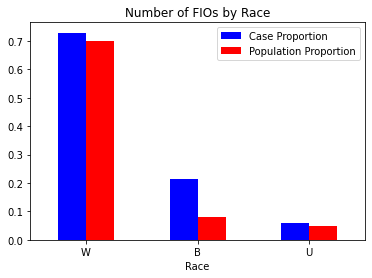

In [6]:
census_w = [.7, .08, .05]
total_race = df.groupby(['Race']).size().nlargest()
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
df1 = pd.DataFrame({'Case Proportion': total_race.values/df.shape[0], 'Population Proportion': census_w}, index=total_race.index)
df1.plot.bar(rot=0, color=['blue', 'red'])
plt.xlabel=('Races')
plt.ylabel=('Total FIOs Reported')
plt.title('Number of FIOs by Race')
plt.show()

Text(0.5, 1.0, 'Percentage of FIOs based on Race')

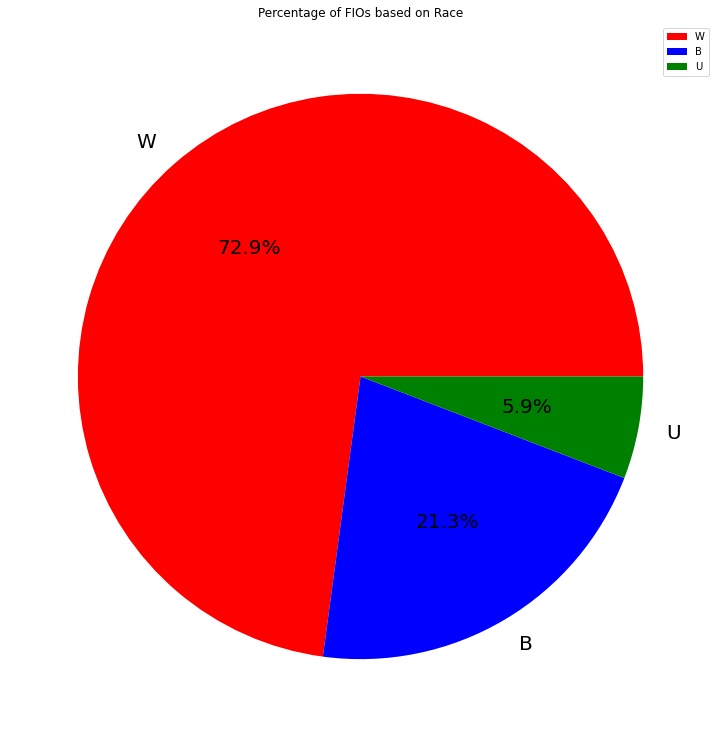

In [7]:
color = ['red', 'blue', 'green']
fig = plt.figure(figsize=(13, 13))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
plot = total_race.plot.pie(subplots=True, autopct='%1.1f%%', colors=color, textprops={'fontsize': 20})
plt.legend()
plt.title('Percentage of FIOs based on Race')